In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows',100)

# Data Reading

In [2]:
data =pd.read_csv('credit.csv')
data.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,63408.0,-1.132677,0.615652,1.464376,0.794720,-0.002052,1.165955,-0.421731,0.894981,0.216008,-0.613336,-2.097297,-0.218216,0.076213,-0.114768,0.717721,-0.052179,-0.015900,0.289907,0.766720,0.225196,-0.003153,0.038276,-0.185248,-1.338119,0.149134,-0.196059,0.293304,0.065966,48.00,0
1,1,129157.0,1.949088,-0.173631,-1.290576,0.863436,-0.399768,-1.826996,0.444184,-0.392352,0.575581,0.165744,-0.385962,-0.343529,-2.175720,0.866259,-0.268317,-0.803918,0.393517,-0.944503,-0.260960,-0.341862,0.032756,0.153590,0.180652,0.872811,0.009710,0.330941,-0.096709,-0.064262,35.64,0
2,2,67623.0,-0.898489,-0.348237,3.126380,-1.968897,-1.014949,0.483739,-0.643849,0.458548,0.147475,-0.858576,-1.277969,-0.347276,-0.325318,-1.561326,-2.281050,0.805359,0.582837,-1.828785,-0.869040,-0.116261,0.213226,0.840346,-0.396982,0.131470,0.547205,-0.259076,0.086891,0.055913,4.60,0
3,3,147630.0,2.117921,-0.815617,-0.899881,-0.457396,-0.649465,-0.512657,-0.511257,-0.185319,-0.179076,0.771267,-1.588599,0.072502,0.612100,-0.159147,-0.053738,-1.192880,-0.307266,0.593334,-0.261948,-0.513285,-0.890817,-2.055234,0.494779,-0.729029,-0.691072,0.091499,-0.036171,-0.044267,40.46,0
4,4,63471.0,1.217274,-1.015679,-0.457817,-2.817000,-0.237332,0.421068,-0.392322,0.114610,0.575762,-0.978947,0.656755,1.601932,1.094884,0.113042,1.892349,-4.344098,1.700924,-0.953552,-0.964073,-0.536448,-0.221950,0.272221,-0.050304,-0.907757,0.612726,-0.535802,0.144996,0.007662,35.88,0


In [3]:
data =data.drop('Unnamed: 0',axis=1)
data.shape

(1000, 31)

In [4]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

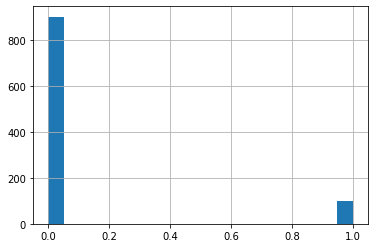

In [5]:
#Looking for balanced or imbalanced
data['Class'].hist(bins=20, figsize=(6,4))

This is imbalnced data

In [6]:
data.Class.value_counts()

0    900
1    100
Name: Class, dtype: int64

In [7]:
#Lets Split the data to avoid data leakage
msk = np.random.rand(len(data)) < 0.8

train = data[msk]

test = data[~msk]

train.shape ,test.shape

((811, 31), (189, 31))

In [8]:
train.Class.value_counts(),test.Class.value_counts()

(0    725
 1     86
 Name: Class, dtype: int64, 0    175
 1     14
 Name: Class, dtype: int64)

In [31]:
#Data Partition
X_train=train.drop('Class',axis=1)
y_train=train['Class']

X_test =test.drop('Class',axis=1)
y_test =test['Class']

In [32]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

# Model Building

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score,roc_curve ,auc
from sklearn.metrics import precision_recall_curve,precision_score,recall_score,f1_score,classification_report

def model_build(X, y,X_test,y_test, model):
    
    model.fit(X,y)
    #Prediction
    y_pred = model.predict(X_test)    
    print('Confusion matrix:  \n', confusion_matrix(y_test,y_pred))
    print('accuracy_score   :   ', accuracy_score(y_test,y_pred))
    print('Precision Score:' , precision_score(y_test,y_pred)) #For imbalnced data Precision,Recall score is more suitable than Accuracy
    print('Recall Score:' , recall_score(y_test,y_pred))
    print('F1 Score:' , f1_score(y_test,y_pred))
    print('\n Classification Report:' , classification_report(y_test,y_pred))
    
    print('AUROC Curve:\n')
    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.show()
    auc_score = roc_auc_score(y_test, probs)
    print('AUC: %.3f' % auc_score)
    
    print('\nPrecision-Recall curve:\n') #For imbalnced data PR curve is more suitable than ROC
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    auc_score = auc(recall, precision)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    plt.plot(recall, precision, marker='.')
    plt.show()
    print('AUC: %.3f' % auc_score)


# Baseline (no oversampling)

Confusion matrix:  
 [[174   1]
 [  2  12]]
accuracy_score   :    0.9841269841269841
Precision Score: 0.9230769230769231
Recall Score: 0.8571428571428571
F1 Score: 0.888888888888889

 Classification Report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99       175
           1       0.92      0.86      0.89        14

    accuracy                           0.98       189
   macro avg       0.96      0.93      0.94       189
weighted avg       0.98      0.98      0.98       189

AUROC Curve:



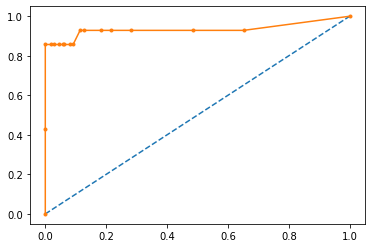

AUC: 0.934

Precision-Recall curve:



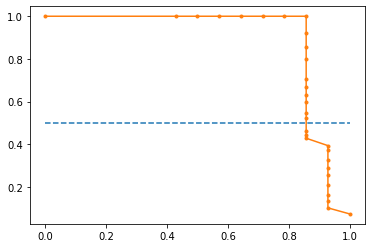

AUC: 0.893


In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
model_build(X_train,y_train,X_test,y_test, rf)

We have about 90% recall on one of our models before we have tried oversampling. Now have to validate on our test data

# Oversampling With SMOTE

Confusion matrix:  
 [[174   1]
 [  2  12]]
accuracy_score   :    0.9841269841269841
Precision Score: 0.9230769230769231
Recall Score: 0.8571428571428571
F1 Score: 0.888888888888889

 Classification Report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99       175
           1       0.92      0.86      0.89        14

    accuracy                           0.98       189
   macro avg       0.96      0.93      0.94       189
weighted avg       0.98      0.98      0.98       189

AUROC Curve:



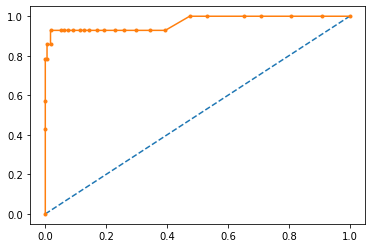

AUC: 0.967

Precision-Recall curve:



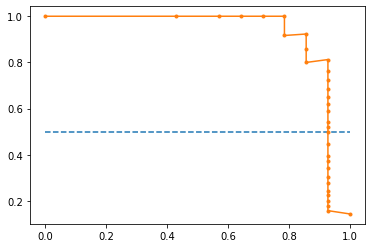

AUC: 0.920


In [35]:
from imblearn.over_sampling import SMOTE

X_train_upsample, y_train_upsample = SMOTE(random_state=42).fit_sample(X_train, y_train)
model_build(X_train_upsample,y_train_upsample,X_test,y_test,rf)

# PCA without Oversampling

In [42]:
x_pca_train.shape

(811, 5)

Confusion matrix:  
 [[173   2]
 [  3  11]]
accuracy_score   :    0.9735449735449735
Precision Score: 0.8461538461538461
Recall Score: 0.7857142857142857
F1 Score: 0.8148148148148148

 Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.99       175
           1       0.85      0.79      0.81        14

    accuracy                           0.97       189
   macro avg       0.91      0.89      0.90       189
weighted avg       0.97      0.97      0.97       189

AUROC Curve:



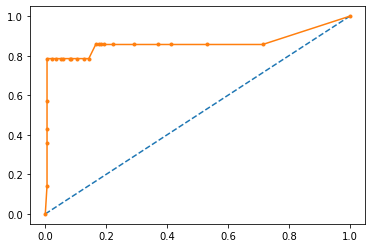

AUC: 0.862

Precision-Recall curve:



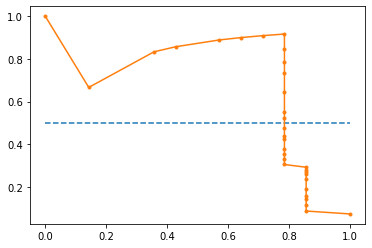

AUC: 0.691


In [48]:
from sklearn.decomposition import PCA 
  
# Let's say, components = 5
pca = PCA(n_components = 5) 
x_pca_train = pca.fit_transform(X_train) 
pca.fit_transform(X_test)

x_pca_test =pca.transform(X_test)

model_build(x_pca_train,y_train,x_pca_test,y_test, rf)    

# PCA with OverSampling

Confusion matrix:  
 [[173   2]
 [  3  11]]
accuracy_score   :    0.9735449735449735
Precision Score: 0.8461538461538461
Recall Score: 0.7857142857142857
F1 Score: 0.8148148148148148

 Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.99       175
           1       0.85      0.79      0.81        14

    accuracy                           0.97       189
   macro avg       0.91      0.89      0.90       189
weighted avg       0.97      0.97      0.97       189

AUROC Curve:



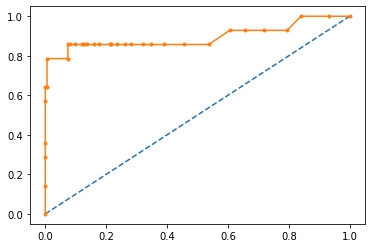

AUC: 0.895

Precision-Recall curve:



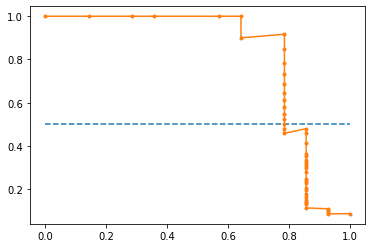

AUC: 0.820


In [50]:
X_train_upsample1, y_train_upsample1 = SMOTE(random_state=42).fit_sample(x_pca_train, y_train)
model_build(X_train_upsample1,y_train_upsample1,x_pca_test,y_test,rf)

# PCA with pipelining

In [59]:
# you can make this a lot easier using Pipeline

from sklearn.pipeline import Pipeline

# fits PCA, transforms data and fits the decision tree classifier
# on the transformed data
pipe = Pipeline([('pca', PCA(n_components=5)),
                 ('model', rf)])

pipe.fit(X_train, y_train)

y_pred=pipe.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[174,   1],
       [  2,  12]], dtype=int64)

In [56]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(pipe, X_train, y_train , scoring ='recall'))

[0.88888889 0.88235294 0.70588235 0.94117647 0.82352941]
